# Cosmic Structures HW3 


## Exercise 1: The Zel'dovich Universe

The Zel’dovich approximation corresponds to first-order Lagrangian perturbation theory with
boundary conditions at $a = 0$ consistent with an initially homogeneous universe. It relates
initial (aka ‘Lagrangian’) positions $q$ (at $D = 0$) to the current (aka ‘Eulerien’) positions $x$ (at
time D) through the 1-parameter family of maps $q \rightarrow x(q, D)$
$$x(q, D) = q − D \nabla_{q} \phi^{\text{ini}} (q), $$
where $D$ is the growing mode in a ΛCDM Universe which also is used as a time variable (the
explicit expression of D is not needed in this exercise). The fractional density $\delta$ (defined through
$\delta := (\rho − \bar{\rho})/\bar{\rho}$) of the stream is given by the Jacobian $J = |det \partial x/ \partial q|$ of the map as
$$1 + \delta(q, D) = |det \partial x/ \partial q|^{-1}$$

### a)

Consider plane-wave one-dimensional initial data $\phi^{\text{ini}}(q) = A \text{cos}(2 \pi q_{x})$ with some amplitude $A > 0$.

#### 1)
Determine numerically or analytically the time $D_{*}$ and location $q_{*}$ of shell-crossing,
which is defined when $ \delta (q_{*}, D_{*}) = \infty $ (i.e. the determinant vanishes).


1. **Zel'dovich Approximation Map:**
   $$
   x(q, D) = q - D \nabla_{q} \phi^{\text{ini}} (q)
   $$

2. **Initial Potential $\phi^{\text{ini}}$:**
   Given:
   $$
   \phi^{\text{ini}}(q) = A \cos(2 \pi q_x)
   $$

3. **Gradient of the Initial Potential:**
   Since $\phi^{\text{ini}}$ is a function of $q_x$ (one-dimensional case), we have:
   $$
   \nabla_{q} \phi^{\text{ini}} (q) = \frac{\partial \phi^{\text{ini}}}{\partial q_x} = -2 \pi A \sin(2 \pi q_x)
   $$

4. **Map Expression:**
   Substitute $\nabla_{q} \phi^{\text{ini}} (q)$ into the Zel'dovich approximation:
   $$
   x(q, D) = q - D (-2 \pi A \sin(2 \pi q_x)) = q + 2 \pi A D \sin(2 \pi q_x)
   $$

5. **Jacobian Determinant:**
   The Jacobian $J$ in one dimension is:
   $$
   J = \left| \frac{\partial x}{\partial q} \right|
   $$
   Compute $\frac{\partial x}{\partial q}$:
   $$
   \frac{\partial x}{\partial q} = 1 + 2 \pi A D \cos(2 \pi q_x)
   $$
   Thus,
   $$
   J = \left| 1 + 2 \pi A D \cos(2 \pi q_x) \right|
   $$

6. **Density Contrast $\delta$:**
   Given by:
   $$
   1 + \delta(q, D) = \left| 1 + 2 \pi A D \cos(2 \pi q_x) \right|^{-1}
   $$

7. **Condition for Shell-Crossing:**
   Shell-crossing occurs when the density contrast $\delta$ goes to infinity, i.e., when the Jacobian determinant $J$ becomes zero:
   $$
   1 + 2 \pi A D \cos(2 \pi q_x) = 0
   $$
   Solve for $D$:
   $$
   2 \pi A D \cos(2 \pi q_x) = -1
   $$
   $$
   D = -\frac{1}{2 \pi A \cos(2 \pi q_x)}
   $$

8. **Time $D_{*}$ of Shell-Crossing:**
   Shell-crossing first occurs at the minimum value of $\cos(2 \pi q_x)$, which is $-1$:
   $$
   D_{*} = -\frac{1}{2 \pi A (-1)} = \frac{1}{2 \pi A}
   $$

9. **Location $q_{*}$ of Shell-Crossing:**
   For $\cos(2 \pi q_x) = -1$:
   $$
   2 \pi q_x = \pi (2n+1) \quad 
   $$
   $$
   q_x = \frac{2n+1}{2}
   $$
   for an integer $n$.


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [71]:
# Parameters
A = 1.0  # Amplitude of the initial potential
n_points = 1000  # Number of points in the spatial grid
q_min, q_max = 0, 1  # Spatial domain

Time of shell-crossing (D*): 0.20202020202020204
Location of shell-crossing (q*): 0.3943943943943944


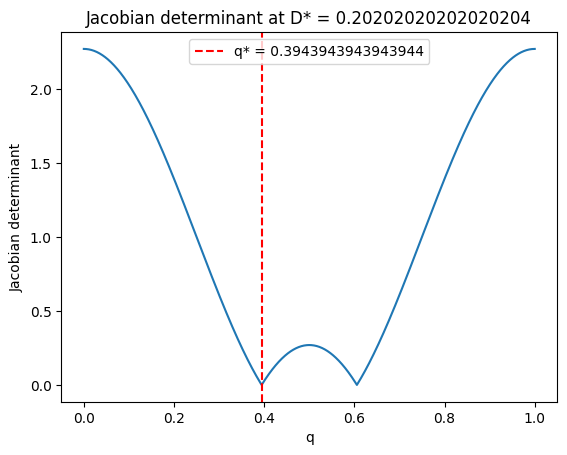

In [72]:

# Spatial grid
q = np.linspace(q_min, q_max, n_points)

# Initial potential and its gradient
phi_ini = A * np.cos(2 * np.pi * q)
grad_phi_ini = -2 * np.pi * A * np.sin(2 * np.pi * q)

# Function to compute x(q, D) according to Zel'dovich approximation
def x_q_D(q, D):
    return q + 2 * np.pi * A * D * np.sin(2 * np.pi * q)

# Function to compute Jacobian determinant
def jacobian_determinant(q, D):
    return np.abs(1 + 2 * np.pi * A * D * np.cos(2 * np.pi * q))

# Find the time of shell-crossing
D_values = np.linspace(0, 1, 100)  # Fine grid for D
D_star = 0
q_star = 0
for D in D_values:
    J = jacobian_determinant(q, D)
    if np.min(J) <= 1e-6:  # Numerical threshold for zero
        D_star = D
        q_star = q[np.argmin(J)]
        break

print(f"Time of shell-crossing (D*): {D_star}")
print(f"Location of shell-crossing (q*): {q_star}")

# Plotting the Jacobian determinant
plt.plot(q, jacobian_determinant(q, D_star))
plt.xlabel('q')
plt.ylabel('Jacobian determinant')
plt.title(f'Jacobian determinant at D* = {D_star}')
plt.axvline(q_star, color='red', linestyle='--', label=f'q* = {q_star}')
plt.legend()
plt.show()

#### 2)
Draw the evolution in phase space, i.e. the graph $(x(qx), \partial Dx(qx))$, and the graph
of the Eulerian stream density $(x(qx), \delta (qx))$ for a few times (use $D$ as the time
coordinate) and for $qx \in [0, 1)$. Make sure to include at least one time before and
after shell-crossing, along with the moment of shell-crossing.


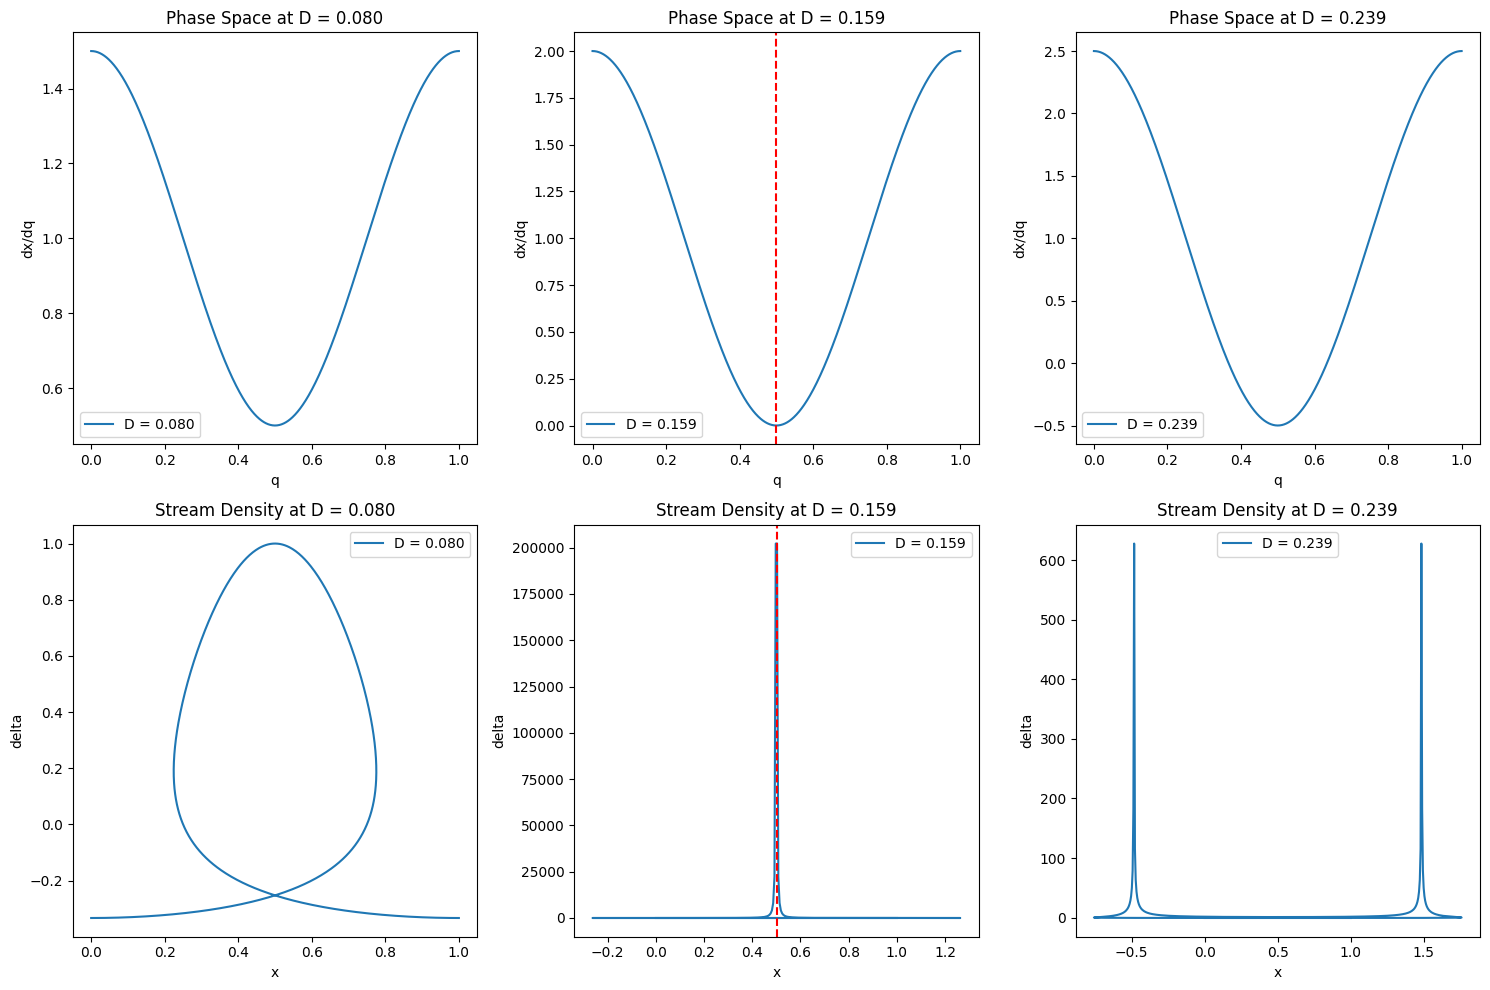

In [73]:
# Spatial grid
q = np.linspace(q_min, q_max, n_points)

# Initial potential and its gradient
phi_ini = A * np.cos(2 * np.pi * q)
grad_phi_ini = -2 * np.pi * A * np.sin(2 * np.pi * q)

# Function to compute x(q, D) according to Zel'dovich approximation
def x_q_D(q, D):
    return q + 2 * np.pi * A * D * np.sin(2 * np.pi * q)

# Function to compute dx/dq
def dx_dq(q, D):
    return 1 + 2 * np.pi * A * D * np.cos(2 * np.pi * q)

# Function to compute Eulerian density contrast
def delta(q, D):
    J = np.abs(dx_dq(q, D))
    return 1 / J - 1

# Determine D* for shell-crossing
D_star = 1 / (2 * np.pi * A)

# Times before, at, and after shell-crossing
D_values = [D_star / 2, D_star, D_star * 1.5]

# Plot the phase space and stream density evolution
fig, axs = plt.subplots(2, len(D_values), figsize=(15, 10))

for i, D in enumerate(D_values):
    x = x_q_D(q, D)
    px = dx_dq(q, D)
    delta_x = delta(q, D)
    
    # Phase space plot (x, dx/dq)
    axs[0, i].plot(q, px, label=f'D = {D:.3f}')
    axs[0, i].set_xlabel('q')
    axs[0, i].set_ylabel('dx/dq')
    axs[0, i].set_title(f'Phase Space at D = {D:.3f}')
    axs[0, i].legend()
    
    # Eulerian stream density plot (x, delta)
    axs[1, i].plot(x, delta_x, label=f'D = {D:.3f}')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('delta')
    axs[1, i].set_title(f'Stream Density at D = {D:.3f}')
    axs[1, i].legend()
    
    # Optional: Highlight the shell-crossing location
    if D == D_star:
        q_star = q[np.argmin(np.abs(dx_dq(q, D)))]
        x_star = x_q_D(q_star, D)
        axs[0, i].axvline(q_star, color='red', linestyle='--', label=f'q* = {q_star:.3f}')
        axs[1, i].axvline(x_star, color='red', linestyle='--', label=f'x* = {x_star:.3f}')

plt.tight_layout()
plt.show()


### b)
Use your Python code from problem set 2 to generate a 3D realisation of $\phi^{(ini)}$ on an $N^{3}$ grid as a Gaussian random field with a power-law power spectrum $P_{\phi}(k) \propto k^{-\alpha}$. Compute the three gradient fields $\nabla \phi^{(ini)}$ based on FFTs. (You should have all this, otherwise you find this part of the code as a Python code snippet on the Moodle page). Now create one particle $x_{i}$ for each of the $i=1,...,N$ grid cells whose initial position is given by each grid cell’s center qjkl (this corresponds to a simple cubic lattice). Now displace each particle from its original position using the Zel’dovich map, i.e. $x_{i} = q_{jkl} + D \nabla \phi^{(ini)}_{jkl}$ for some $D$ (you might have to play with the values, but you should choose a $D$ large enough that you can see the points move).

C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\3193140730.py:19: RuntimeWarning: divide by zero encountered in power
  fk = fk * kmod**-(alpha / 2)  # multiply with amplitude
C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\3193140730.py:31: RuntimeWarning: invalid value encountered in divide
  fD[..., i] = fk * 1j * kv[i] / kmod


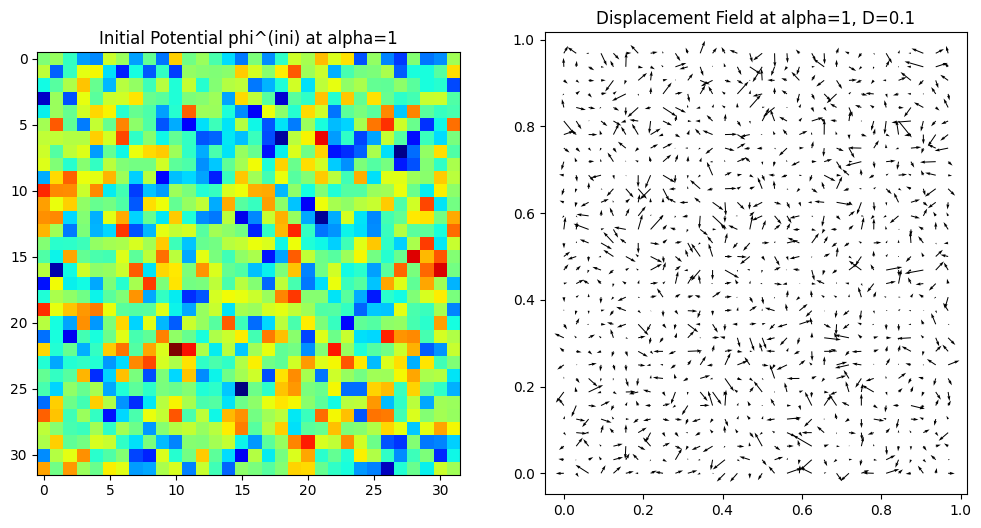

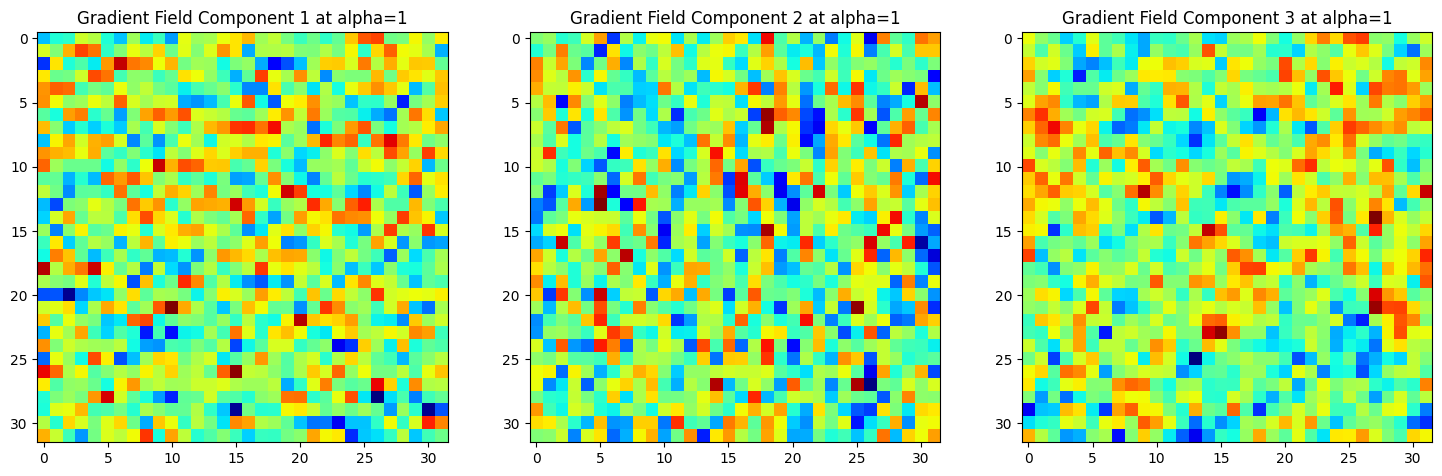

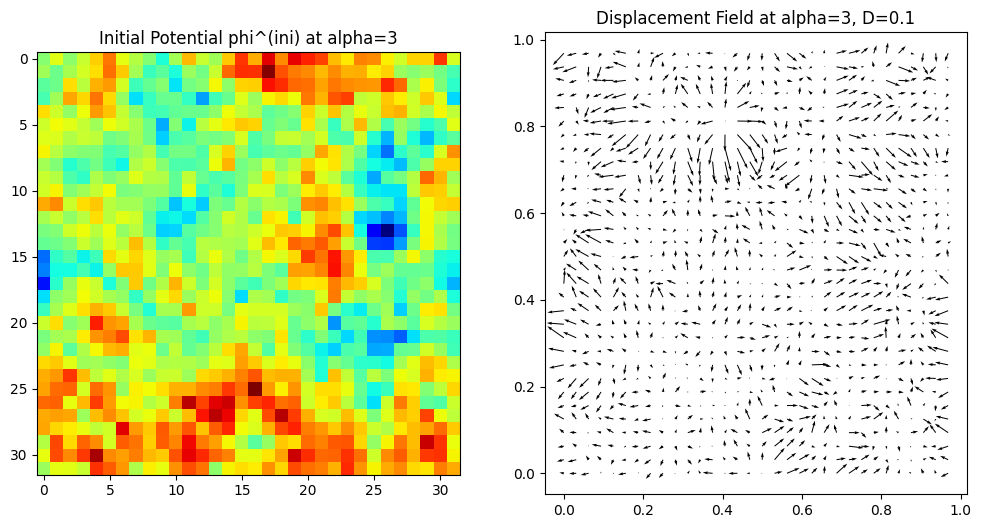

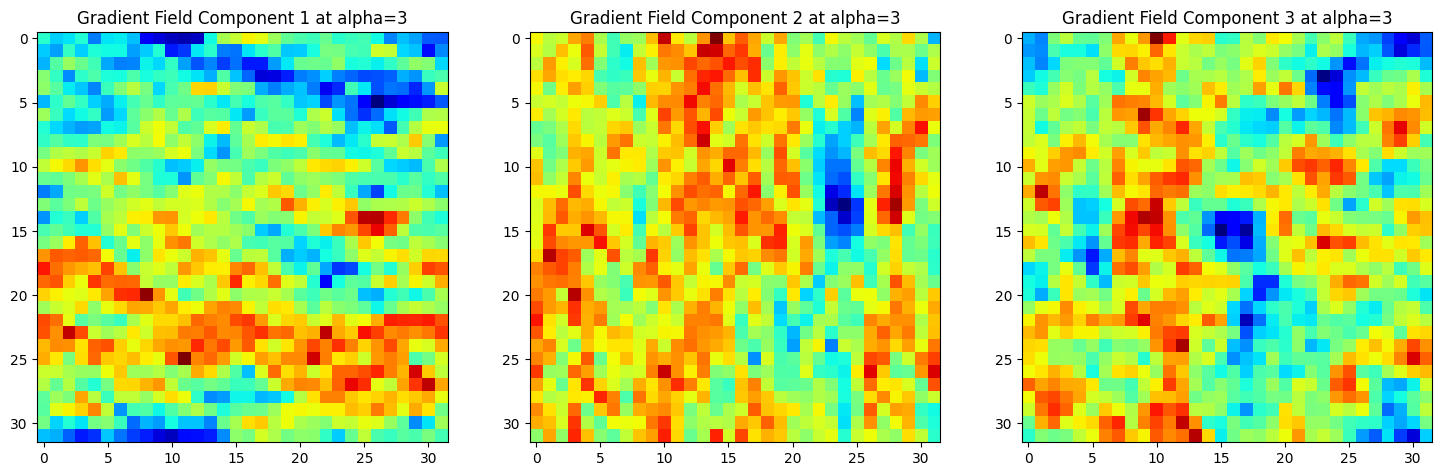

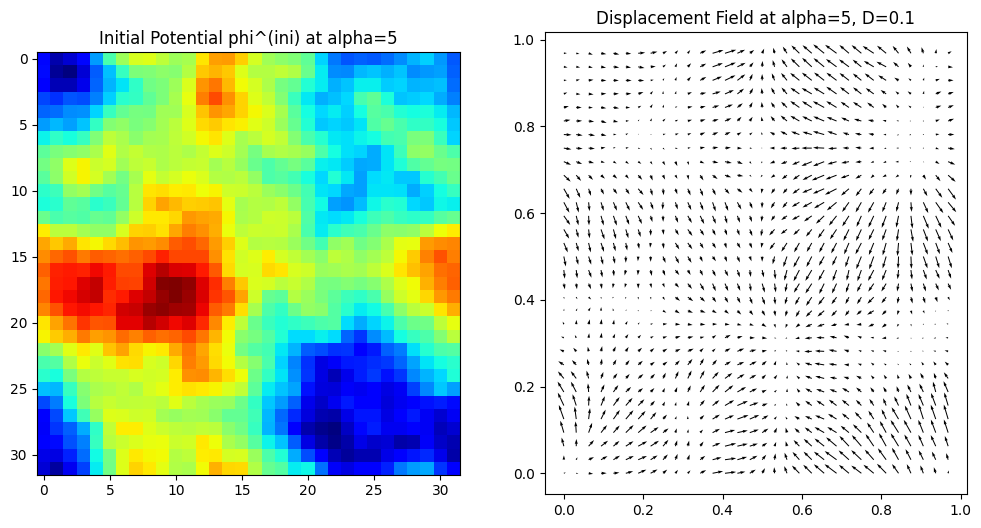

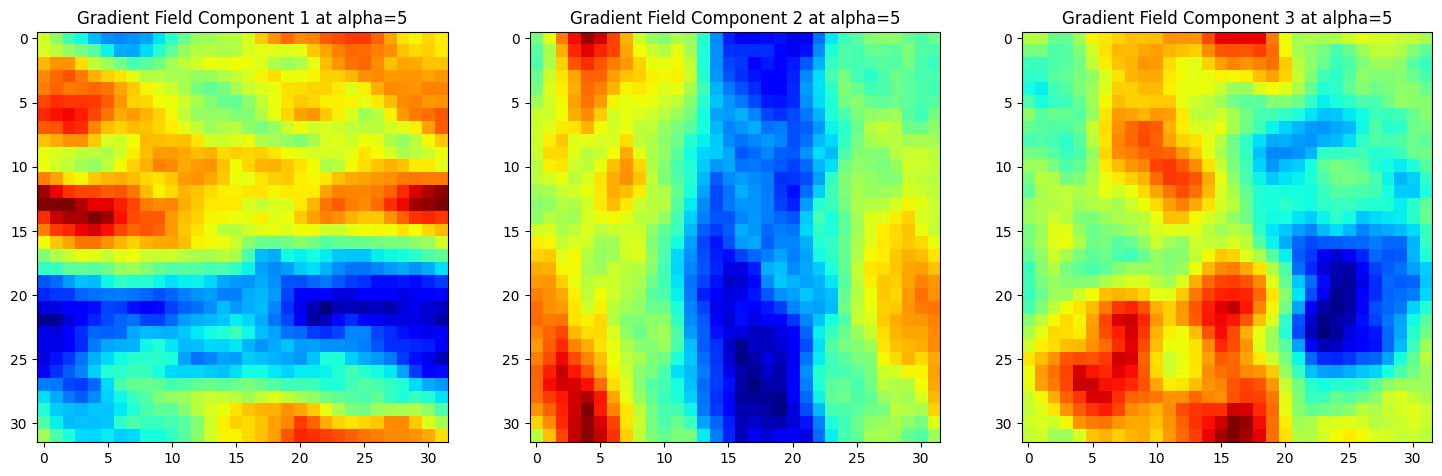

In [74]:
# Parameters
N = 32
alphas = [1, 3, 5]
L = 1.0  # the 'physical' box size, sets units of the fundamental mode
kmin = 2.0 * np.pi / L  # the fundamental mode of the box
kmax = kmin * N / 2  # the Nyquist mode of each linear dimension
k1d = np.fft.fftfreq(N, d=1.0 / kmin / N)  # get FFT mode vector
kv = np.meshgrid(k1d, k1d, k1d, indexing='ij')  # get k vector, k = (kx, ky, kz)

# Function to compute the power spectrum
def P_k(k, alpha):
    return np.where(k > 0, k**(-alpha), 0.0)

# Function to compute the initial potential
def generate_phi_ini(N, alpha):
    norm = 1.0 / (2 * np.pi)**(-1.5)
    kmod = np.sqrt(kv[0]**2 + kv[1]**2 + kv[2]**2)  # modulus of k = (kx,ky,kz)
    fk = np.random.normal(size=(N, N, N)) + 1j * np.random.normal(size=(N, N, N))
    fk = fk * kmod**-(alpha / 2)  # multiply with amplitude
    fk[0, 0, 0] = 0.0  # zero f(k=0), to enforce zero mean
    f = np.fft.ifftn(fk)  # inverse transform
    f = norm * np.real(f)  # take real part and normalize
    return f

# Function to compute the gradient fields using FFT
def compute_gradient_fields(phi_ini, N):
    fD = np.zeros([N, N, N, 3], dtype=complex)
    kmod = np.sqrt(kv[0]**2 + kv[1]**2 + kv[2]**2)  # modulus of k = (kx,ky,kz)
    fk = np.fft.fftn(phi_ini)  # Fourier transform of phi_ini
    for i in range(3):
        fD[..., i] = fk * 1j * kv[i] / kmod
        fD[0, 0, 0, i] = 0.0
    D = np.real(np.fft.ifftn(fD, axes=[0, 1, 2]))  # inverse transform
    return D

# Function to displace particles using the Zel'dovich approximation
def displace_particles(N, D, gradient_field):
    q = np.linspace(0, L, N, endpoint=False)
    q_grid = np.meshgrid(q, q, q, indexing='ij')
    q_vec = np.stack(q_grid, axis=-1)
    x = q_vec + D * gradient_field
    return q_vec, x

# Visualization of the initial potential, gradient fields, and particle displacement
for alpha in alphas:
    phi_ini = generate_phi_ini(N, alpha)
    gradient_fields = compute_gradient_fields(phi_ini, N)
    D = 0.1  # You may adjust D to visualize the displacement
    q_vec, x_vec = displace_particles(N, D, gradient_fields)

    fig, ax = plt.subplots(1, 2, figsize=[12, 6])
    ax[0].imshow(phi_ini[:, :, N // 2], cmap='jet')
    ax[0].set_title(f'Initial Potential phi^(ini) at alpha={alpha}')

    ax[1].quiver(q_vec[:, :, N // 2, 0], q_vec[:, :, N // 2, 1],
                 x_vec[:, :, N // 2, 0] - q_vec[:, :, N // 2, 0],
                 x_vec[:, :, N // 2, 1] - q_vec[:, :, N // 2, 1])
    ax[1].set_title(f'Displacement Field at alpha={alpha}, D={D}')

    plt.show()

    fig, ax = plt.subplots(1, 3, figsize=[18, 6])
    for i in range(3):
        ax[i].imshow(gradient_fields[:, :, N // 2, i], cmap='jet')
        ax[i].set_title(f'Gradient Field Component {i+1} at alpha={alpha}')
    plt.show()


#### 1)
Visualize the points (either use a low resolution e.g. $N = 32$ or subsample the points if you use matplotlib’s scatter routine1. You can of course use any more sophisticated 3D plotting/rendering tool as well). Can you (by eye or numerically) find the moment of first shell crossing for a few (say 2-3) values of $\alpha$? Show the distribution of points at that moment and shortly after and discuss the results qualitatively.

C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:19: RuntimeWarning: divide by zero encountered in power
  fk = fk * kmod**-(alpha / 2)  # multiply with amplitude
C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:31: RuntimeWarning: invalid value encountered in divide
  fD[..., i] = fk * 1j * kv[i] / kmod
C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:46: RuntimeWarning: invalid value encountered in divide
  fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)


Shell-crossing for alpha=1 occurs at D*=333.333


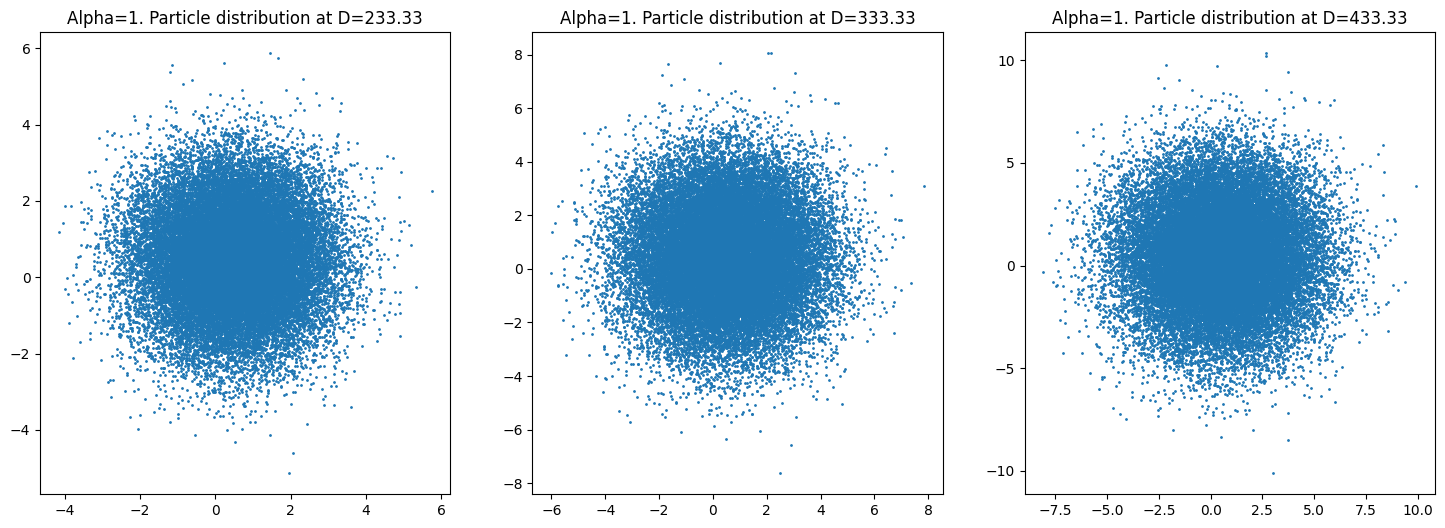

C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:19: RuntimeWarning: divide by zero encountered in reciprocal
  fk = fk * kmod**-(alpha / 2)  # multiply with amplitude


Shell-crossing for alpha=2 occurs at D*=666.667


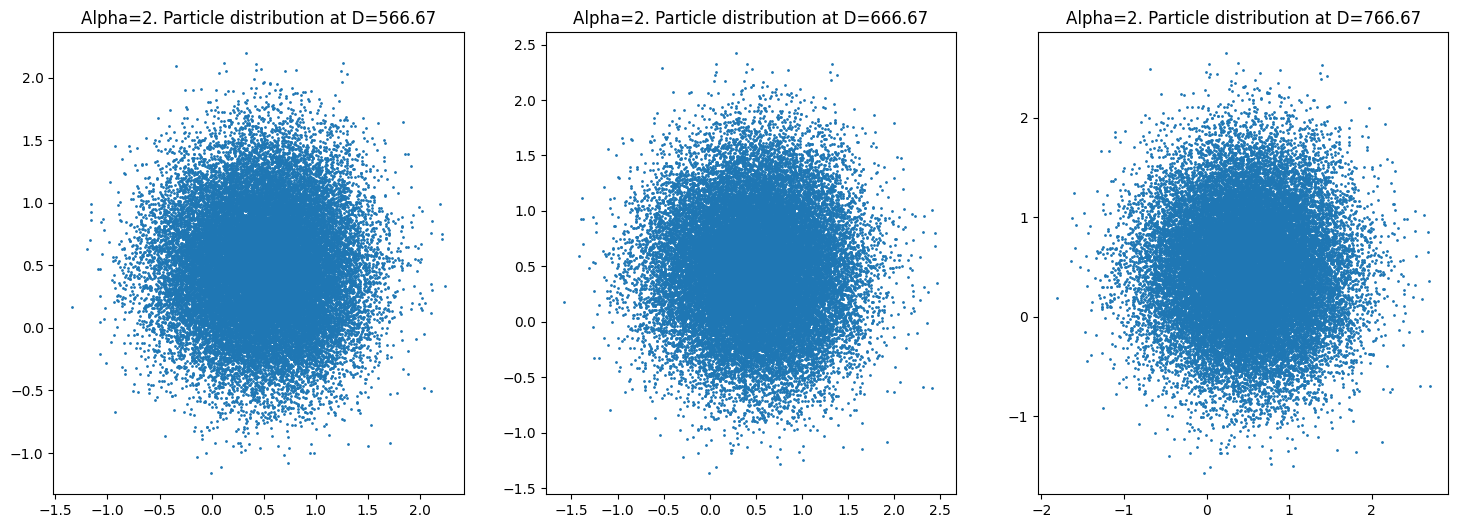

Shell-crossing for alpha=3 occurs at D*=2333.333


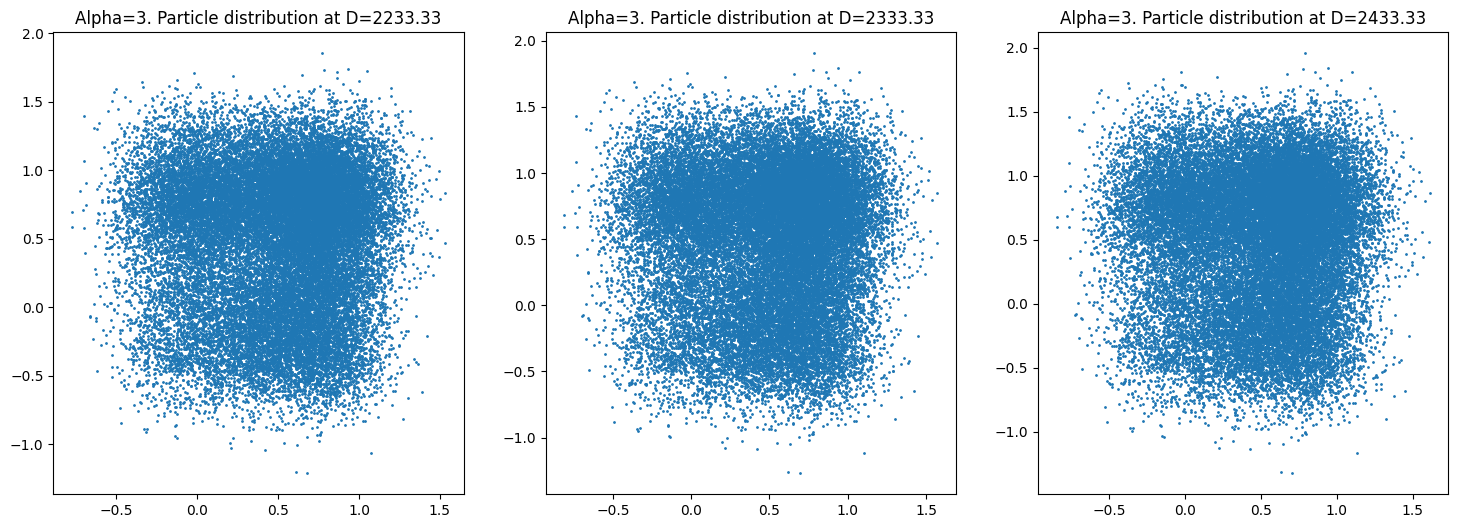

In [81]:
# Parameters
N = 32
alphas = [1,2,3]
L = 1.0  # the 'physical' box size, sets units of the fundamental mode
kmin = 2.0 * np.pi / L  # the fundamental mode of the box
kmax = kmin * N / 2  # the Nyquist mode of each linear dimension
k1d = np.fft.fftfreq(N, d=1.0 / kmin / N)  # get FFT mode vector
kv = np.meshgrid(k1d, k1d, k1d, indexing='ij')  # get k vector, k = (kx, ky, kz)

# Function to compute the power spectrum
def P_k(k, alpha):
    return np.where(k > 0, k**(-alpha), 0.0)

# Function to generate the initial potential
def generate_phi_ini(N, alpha):
    norm = 1.0 / (2 * np.pi)**(-1.5)
    kmod = np.sqrt(kv[0]**2 + kv[1]**2 + kv[2]**2)  # modulus of k = (kx,ky,kz)
    fk = np.random.normal(size=(N, N, N)) + 1j * np.random.normal(size=(N, N, N))
    fk = fk * kmod**-(alpha / 2)  # multiply with amplitude
    fk[0, 0, 0] = 0.0  # zero f(k=0), to enforce zero mean
    f = np.fft.ifftn(fk)  # inverse transform
    f = norm * np.real(f)  # take real part and normalize
    return f

# Function to compute the gradient fields using FFT
def compute_gradient_fields(phi_ini, N):
    fD = np.zeros([N, N, N, 3], dtype=complex)
    kmod = np.sqrt(kv[0]**2 + kv[1]**2 + kv[2]**2)  # modulus of k = (kx,ky,kz)
    fk = np.fft.fftn(phi_ini)  # Fourier transform of phi_ini
    for i in range(3):
        fD[..., i] = fk * 1j * kv[i] / kmod
        fD[0, 0, 0, i] = 0.0
    D = np.real(np.fft.ifftn(fD, axes=[0, 1, 2]))  # inverse transform
    return D

# Function to compute the Hessian field using FFT
def compute_hessian_field(phi_ini, N):
    kmod = np.sqrt(kv[0]**2 + kv[1]**2 + kv[2]**2)  # modulus of k = (kx,ky,kz)
    fk = np.fft.fftn(phi_ini)  # Fourier transform of phi_ini
    # create an empty N*N*N*3*3 field (5D!) to hold the hessian field
    fD2 = np.zeros([N,N,N,3,3],dtype=complex)
    # loop over dimensions
    for i in range(3):
        for l in range(3):
            # store component i in gradient field
            fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)
            fD2[0,0,0,i,l] = 0.0
    # inverse transform along axes 0,1,2 (but not 3 and 4) of the 5d array
    D2 = np.real(np.fft.ifftn(fD2,axes=[0,1,2]))
    return D2

# Function to displace particles using the Zel'dovich approximation
def displace_particles(N, D, gradient_field):
    q = np.linspace(0, L, N, endpoint=False)
    q_grid = np.meshgrid(q, q, q, indexing='ij')
    q_vec = np.stack(q_grid, axis=-1)
    x = q_vec + D * gradient_field
    return q_vec, x

# Function to determine the moment of first shell crossing
def find_shell_crossing(D_values, gradient_fields, hessian_fields, N):
    for D in D_values:
        jacobian = np.empty((N, N, N, 3, 3))
        for i in range(3):
            for j in range(3):
                jacobian[..., i, j] = (1 if i == j else 0) + D * hessian_fields[...,i, j]
        det_jacobian = np.linalg.det(jacobian)
        # print(D, np.min(det_jacobian))
        if np.any(det_jacobian <= 0):
            return D
    return 0

# Visualization and shell-crossing detection for different values of alpha
# D_values = np.linspace(0, 0.2, 100)
D_values = np.linspace(0, 3000, 10)

for alpha in alphas:
    phi_ini = generate_phi_ini(N, alpha)
    gradient_fields = compute_gradient_fields(phi_ini, N)
    hessian_fields = compute_hessian_field(phi_ini, N)
    D_star = find_shell_crossing(D_values, gradient_fields, hessian_fields, N)
    print(f'Shell-crossing for alpha={alpha} occurs at D*={D_star:.3f}')

    # Visualize the points at D* and shortly after
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    for i, D in enumerate([D_star - 100, D_star, D_star + 100]):
        q_vec, x_vec = displace_particles(N, D, gradient_fields)
        ax[i].scatter(x_vec[..., 0].flatten(), x_vec[..., 1].flatten(), s=1)
        ax[i].set_title(f'Alpha={alpha}. Particle distribution at D={D:.2f}')

    plt.show()

    # Plotting the gradient field
    """fig, ax = plt.subplots(1, 3, figsize=[18, 6])
    for i in range(3):
        ax[i].imshow(gradient_fields[:, :, N // 2, i], cmap='jet')
        ax[i].set_title(f'Gradient Field Component {i+1} at alpha={alpha}')
    plt.show()"""


#### 2)

Make two more versions of the plots: One where you colour your points by the fractional overdensity $1 + \delta$ (close to shell-crossing, you might need to use a logarithmic
colour-scale), and one where you colour the points by the eigenvalue signature $s$ (as computed in the last exercise sheet). Can you relate the signature to the dynamics
of the points and the evolution of the density?

C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:19: RuntimeWarning: divide by zero encountered in power
  fk = fk * kmod**-(alpha / 2)  # multiply with amplitude
C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:31: RuntimeWarning: invalid value encountered in divide
  fD[..., i] = fk * 1j * kv[i] / kmod
C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:46: RuntimeWarning: invalid value encountered in divide
  fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)


Shell-crossing for alpha=1 occurs at D*=333.333


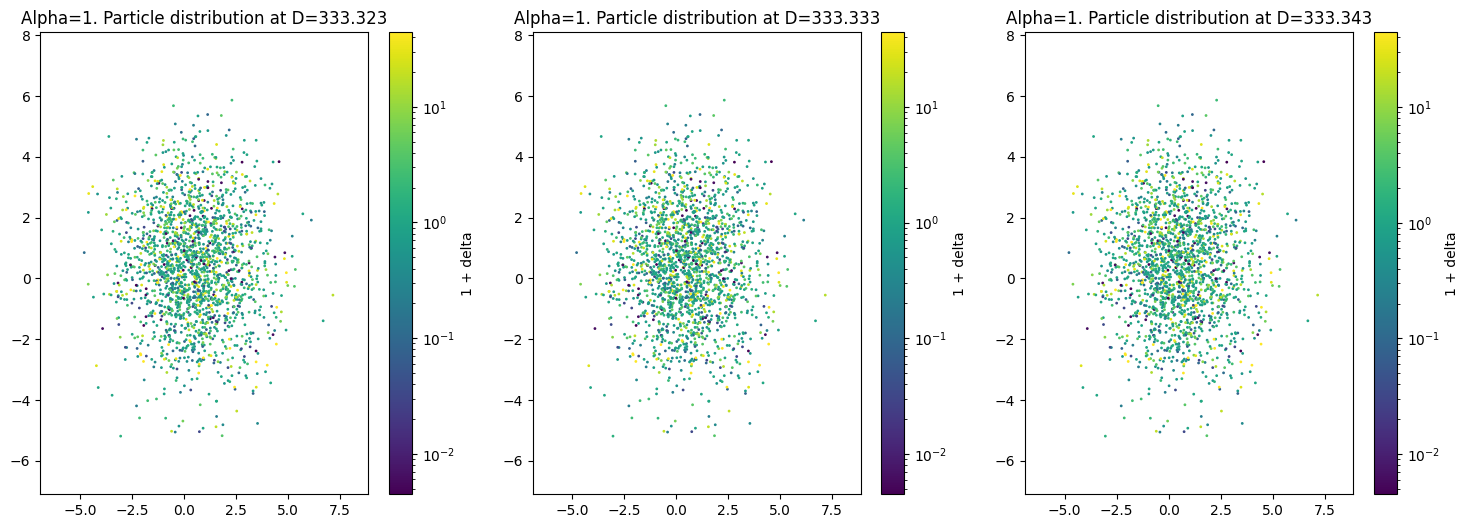

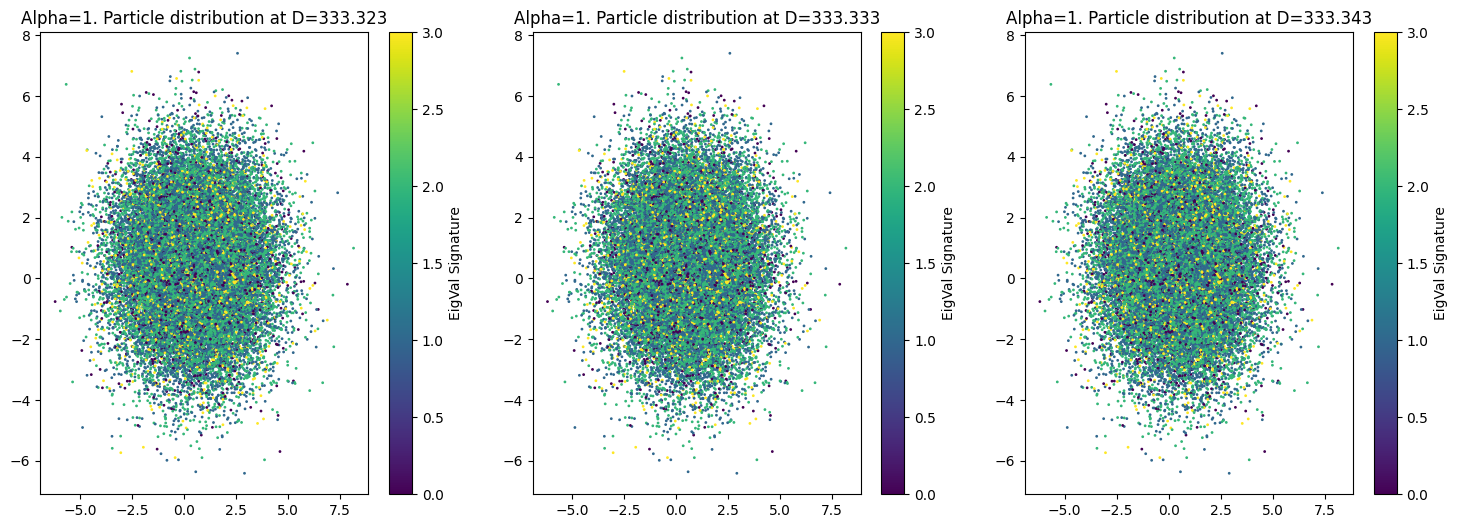

C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:19: RuntimeWarning: divide by zero encountered in reciprocal
  fk = fk * kmod**-(alpha / 2)  # multiply with amplitude


Shell-crossing for alpha=2 occurs at D*=666.667


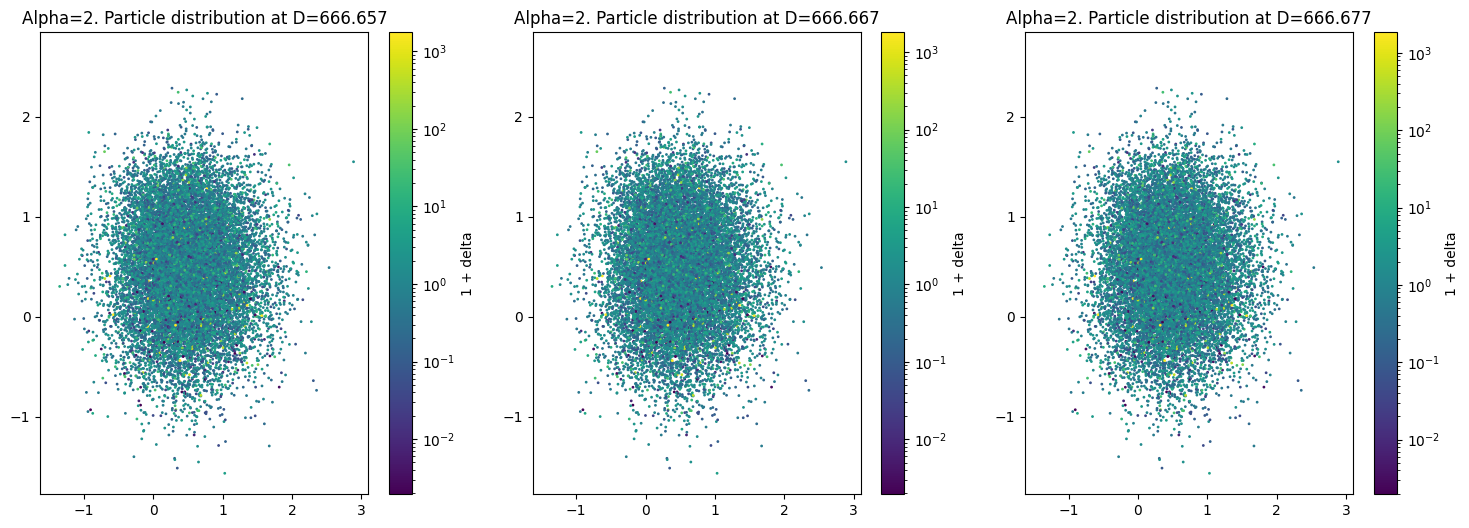

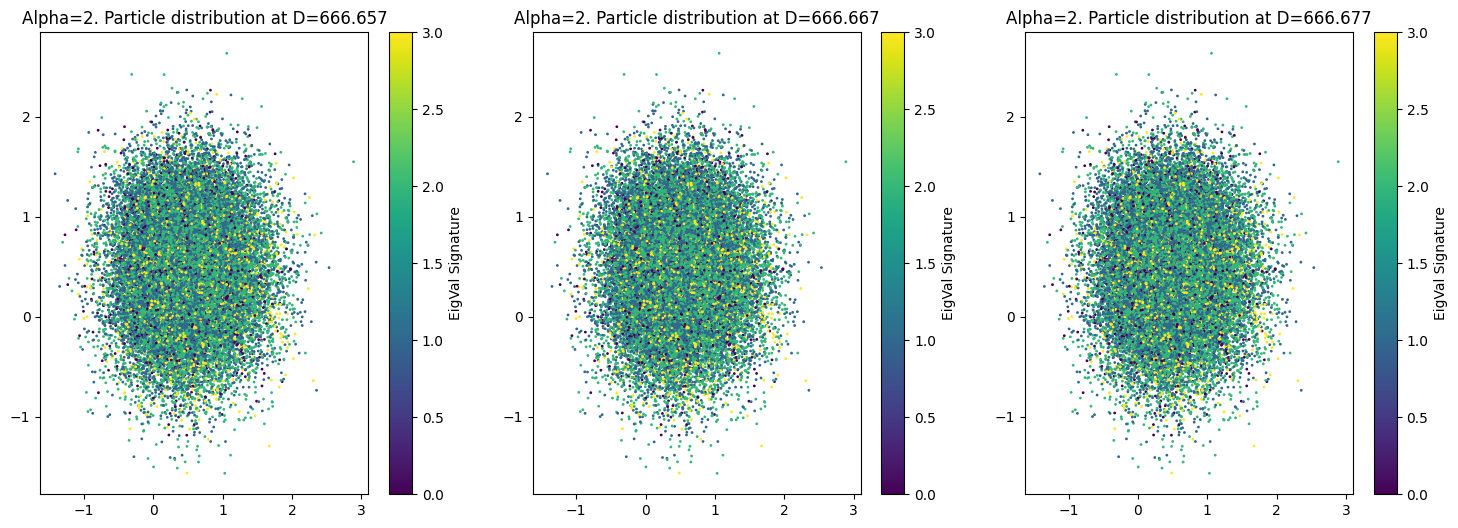

Shell-crossing for alpha=3 occurs at D*=2333.333


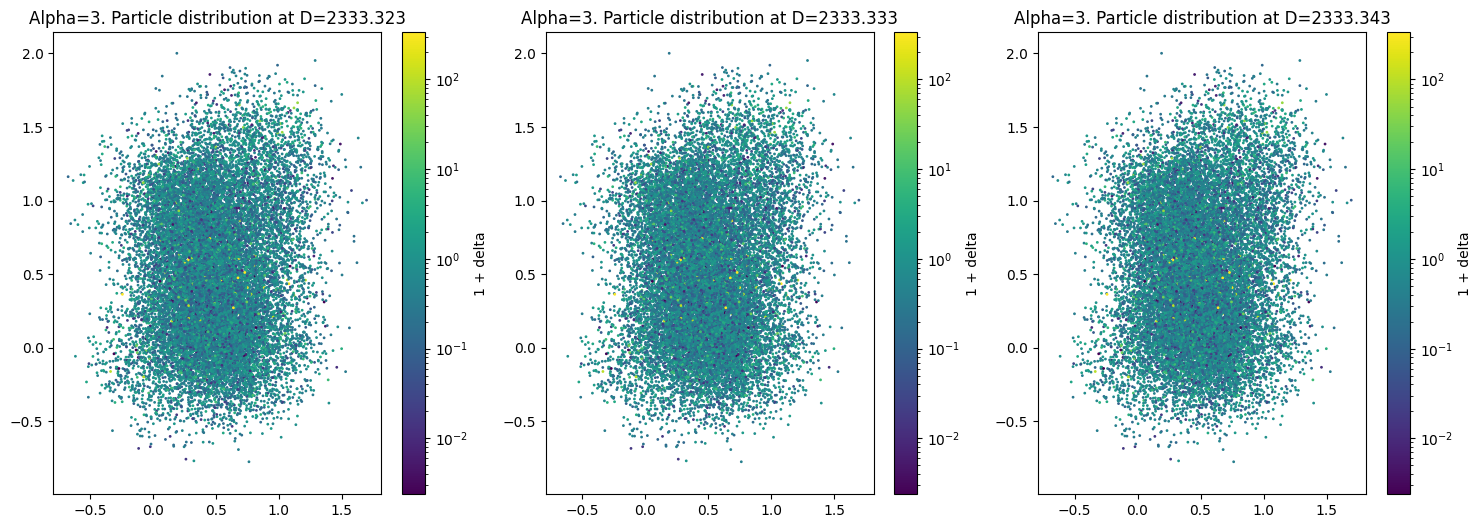

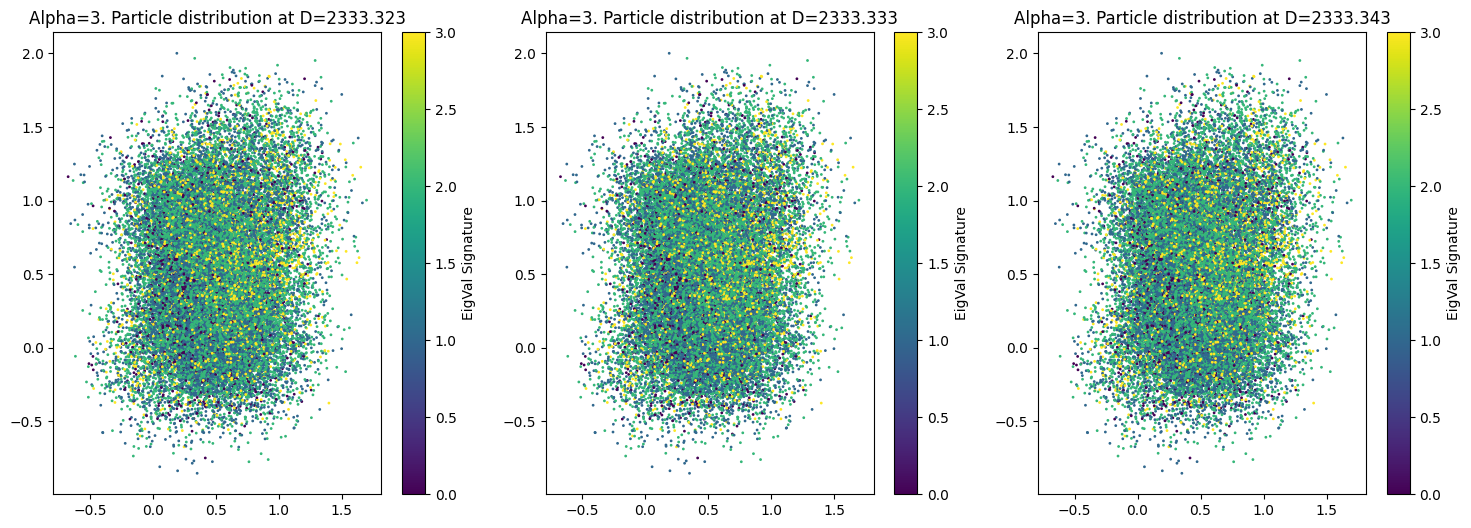

In [82]:
# Function to calculate the Hessian eigenvalues
def calculate_hessian_eigenvalues(D2, N):
    # Store eigenvalues of Hessian of each point x
    hess_eigvals = np.zeros([N,N,N,3])
    hess_eigvals[...,:] = np.linalg.eigvalsh(D2[...,:,:])

    # Count number of positive eigenvalues of Hessian of each point x
    hess_sig = np.zeros([N,N,N])
    hess_sig[...] = np.sum(hess_eigvals > 0, axis=-1)
    
    return hess_eigvals, hess_sig

# Function to calculate fractional overdensity 1 + delta
def calculate_density(gradient_fields, N, D):
    jacobian = np.empty((N, N, N, 3, 3))
    for i in range(3):
        for j in range(3):
            jacobian[..., i, j] = (1 if i == j else 0) + D * gradient_fields[..., i, j]
    det_jacobian = np.linalg.det(jacobian)
    delta = 1 / det_jacobian - 1
    return delta

def find_shell_crossing(D_values, gradient_fields, N):
    for D in D_values:
        jacobian = np.empty((N, N, N, 3, 3))
        for i in range(3):
            for j in range(3):
                jacobian[..., i, j] = (1 if i == j else 0) + D * gradient_fields[..., i, j]
        det_jacobian = np.linalg.det(jacobian)
        if np.any(det_jacobian <= 0):
            return D
    return 0

# Visualization and shell-crossing detection for different values of alpha
D_values = np.linspace(0, 1000, 100)
D_values = np.linspace(0, 3000, 10)

for alpha in alphas:
    phi_ini = generate_phi_ini(N, alpha)
    gradient_fields = compute_gradient_fields(phi_ini, N)
    hessian_fields = compute_hessian_field(phi_ini, N)
    hess_eigvals, hess_sig = calculate_hessian_eigenvalues(hessian_fields, N)
    D_star = find_shell_crossing(D_values, gradient_fields, N)
    print(f'Shell-crossing for alpha={alpha} occurs at D*={D_star:.3f}')

    # Visualize the points at D* and shortly after
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    for i, D in enumerate([D_star - 0.01, D_star, D_star + 0.01]):
        q_vec, x_vec = displace_particles(N, D, gradient_fields)
        delta = calculate_density(gradient_fields, N, D)
        delta_flat = delta.flatten()
        hess_sig_flat = hess_sig.flatten()
        
        scatter = ax[i].scatter(x_vec[..., 0].flatten(), x_vec[..., 1].flatten(), c=delta_flat, cmap='viridis', s=1, norm="log")
        ax[i].set_title(f'Alpha={alpha}. Particle distribution at D={D:.3f}')
        fig.colorbar(scatter, ax=ax[i], label='1 + delta')
    plt.show()

    # Visualize the points colored by the eigenvalue signature
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    for i, D in enumerate([D_star - 0.01, D_star, D_star + 0.01]):
        q_vec, x_vec = displace_particles(N, D, gradient_fields)
        hess_sig_flat = hess_sig.flatten()
        
        scatter = ax[i].scatter(x_vec[..., 0].flatten(), x_vec[..., 1].flatten(), c=hess_sig_flat, cmap='viridis', s=1)
        ax[i].set_title(f'Alpha={alpha}. Particle distribution at D={D:.3f}')
        fig.colorbar(scatter, ax=ax[i], label='EigVal Signature')
    plt.show()

#### 3)
Plot the distribution function of the density $p(\delta)$ as it evolves from Gaussian to non-Gaussian with increasing $D$, and plot also the four conditional distributions $p(\delta|s)$
for the four eigenvalue signatures $s$.


C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:19: RuntimeWarning: divide by zero encountered in power
  fk = fk * kmod**-(alpha / 2)  # multiply with amplitude
C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:31: RuntimeWarning: invalid value encountered in divide
  fD[..., i] = fk * 1j * kv[i] / kmod
C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:46: RuntimeWarning: invalid value encountered in divide
  fD2[...,i,l] = - fk * (kv[i] / kmod) * (kv[l] / kmod)


Shell-crossing for alpha=1 occurs at D*=333.333


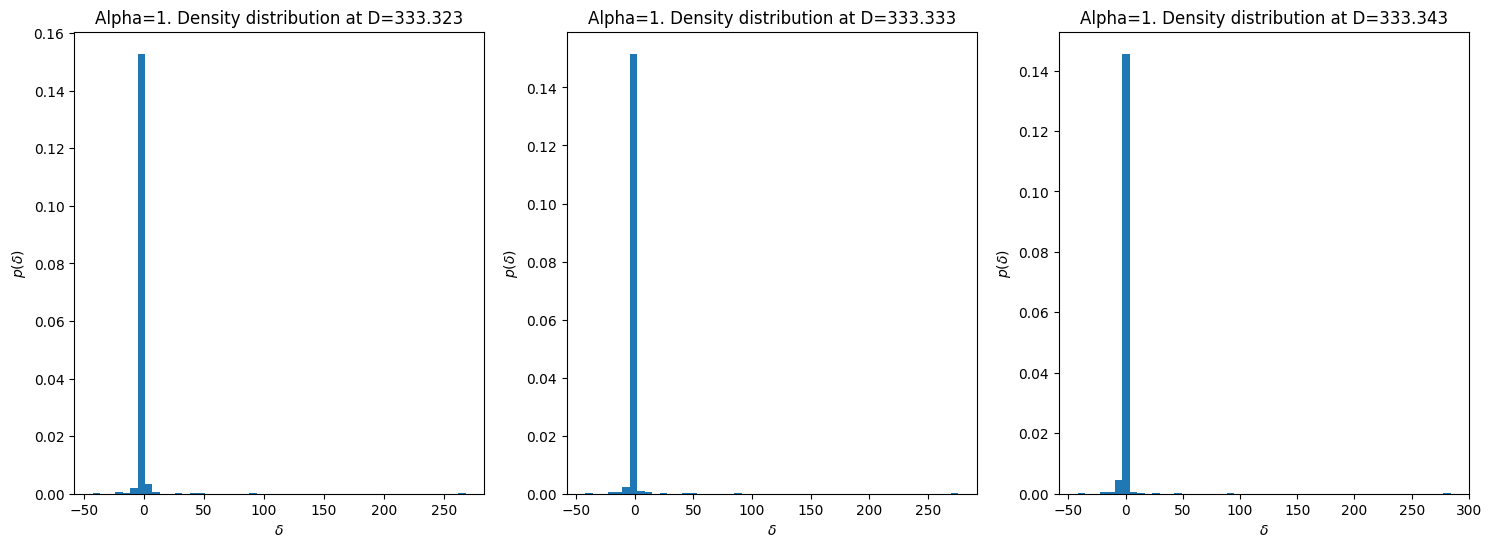

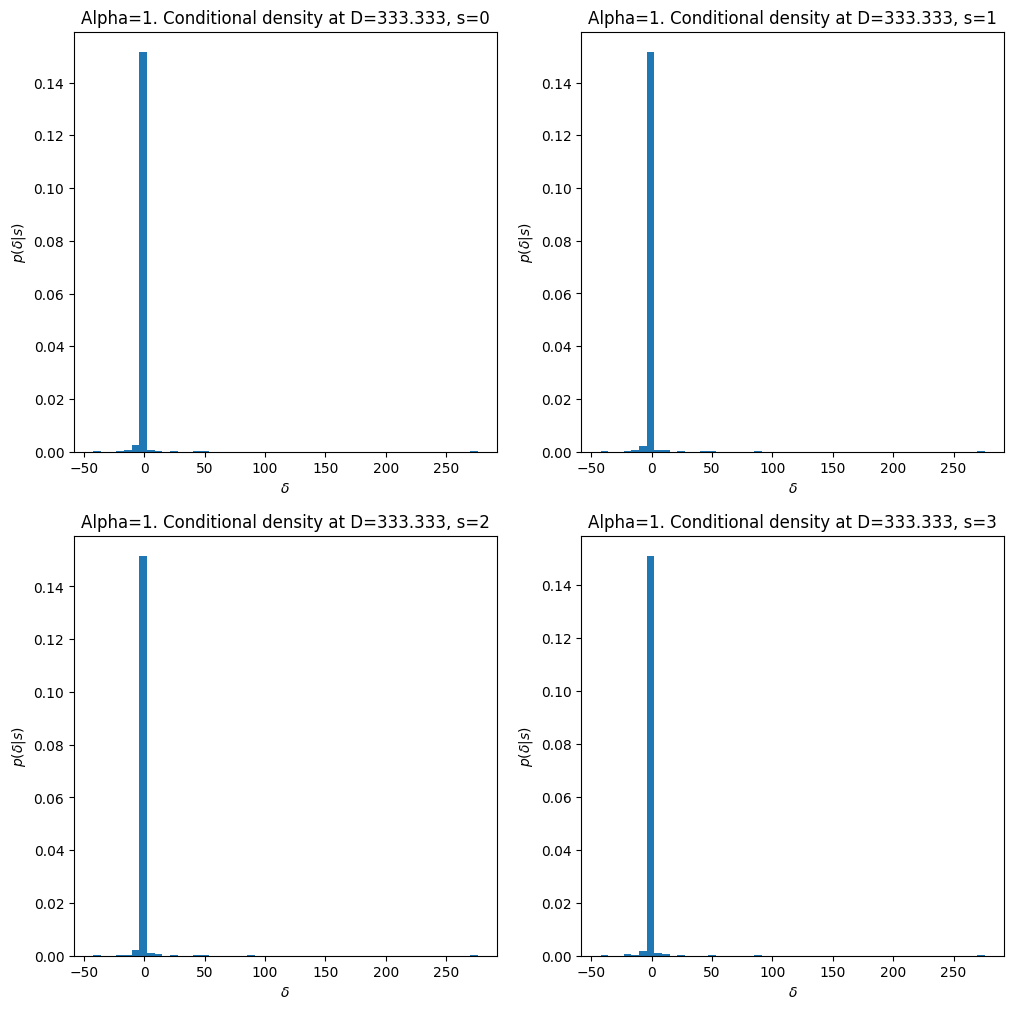

C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:19: RuntimeWarning: divide by zero encountered in reciprocal
  fk = fk * kmod**-(alpha / 2)  # multiply with amplitude


Shell-crossing for alpha=2 occurs at D*=333.333


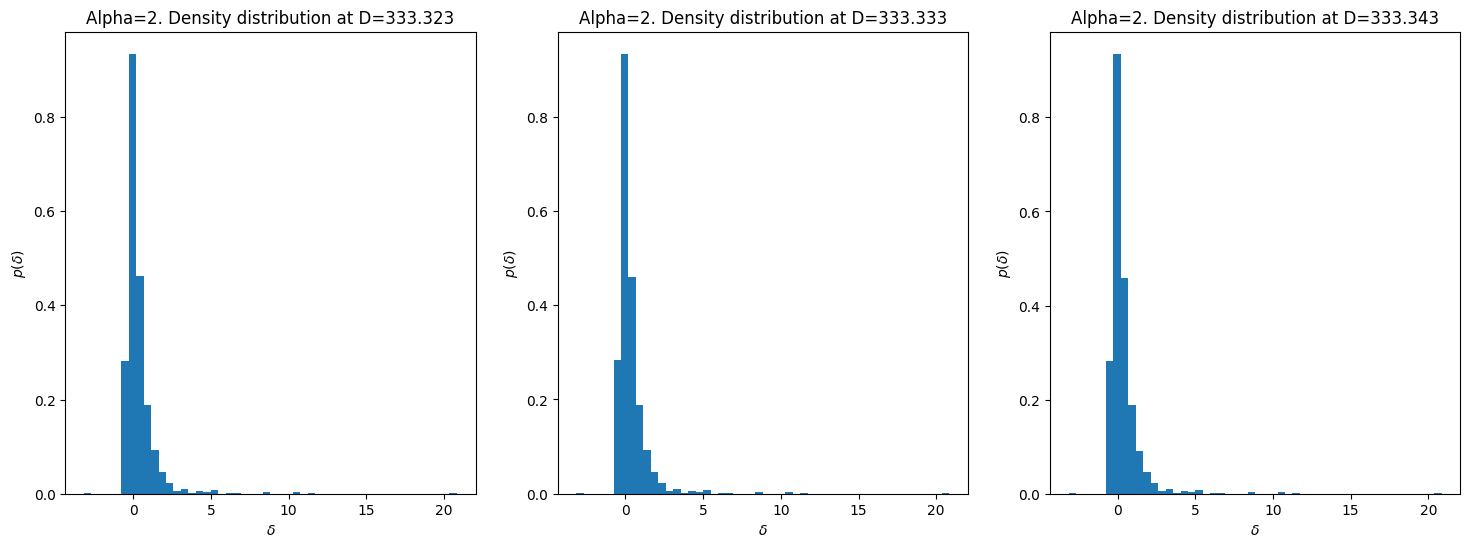

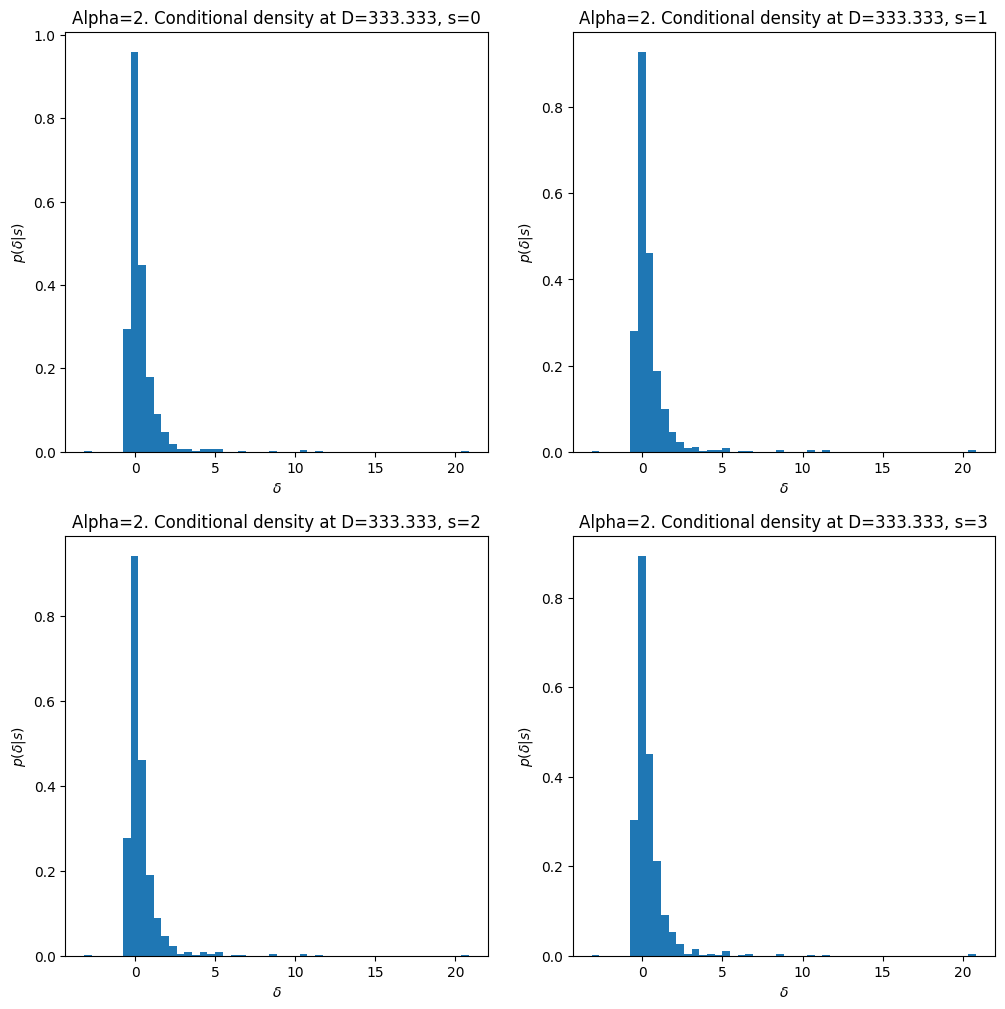

Shell-crossing for alpha=3 occurs at D*=2666.667


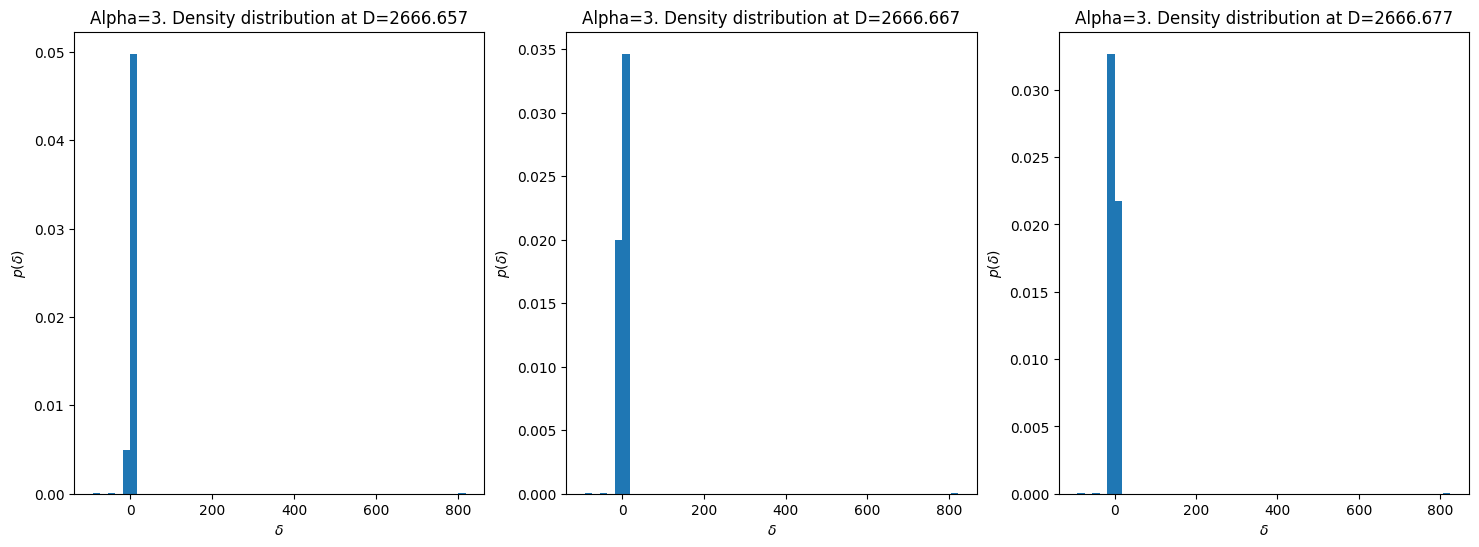

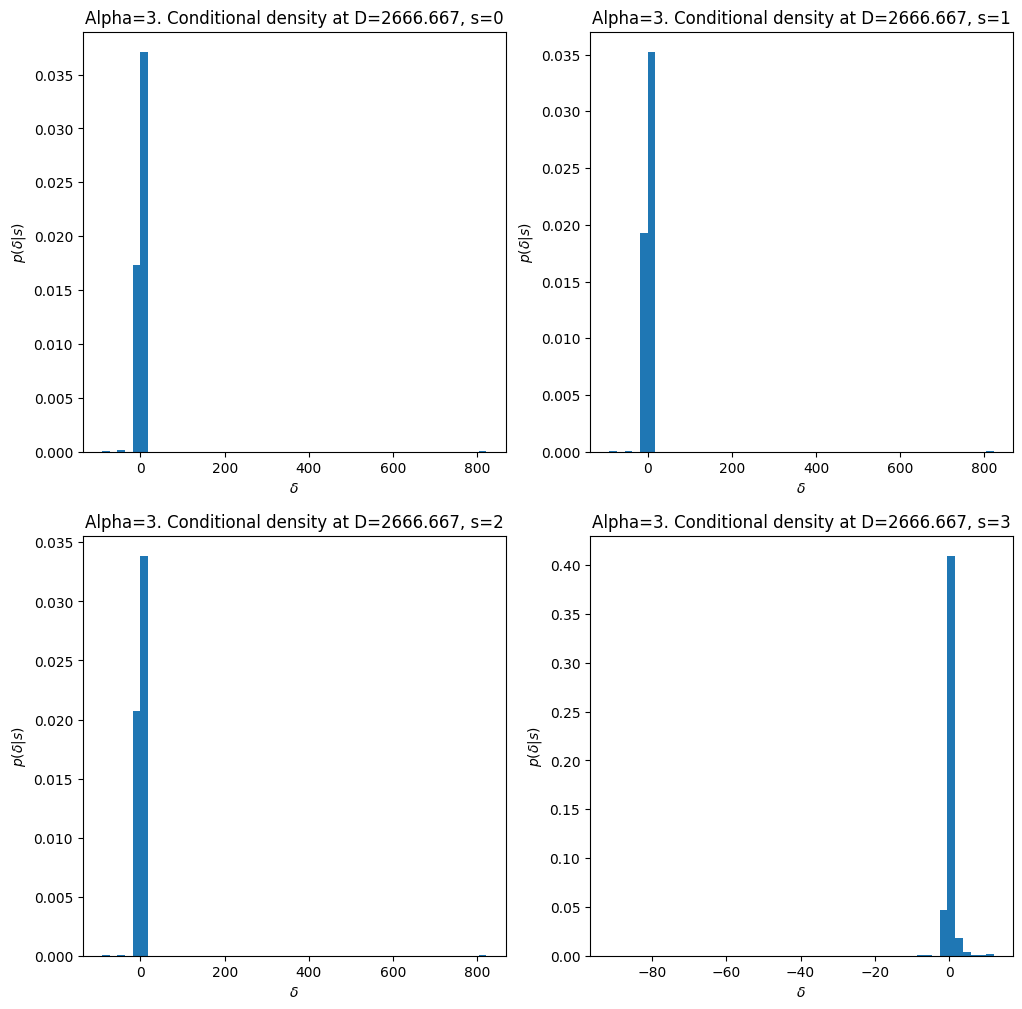

In [83]:
# Function to calculate fractional overdensity 1 + delta
def calculate_density(gradient_fields, N, D):
    jacobian = np.empty((N, N, N, 3, 3))
    for i in range(3):
        for j in range(3):
            jacobian[..., i, j] = (1 if i == j else 0) + D * gradient_fields[..., i, j]
    det_jacobian = np.linalg.det(jacobian)
    delta = 1 / det_jacobian - 1
    return delta

for alpha in alphas:
    phi_ini = generate_phi_ini(N, alpha)
    gradient_fields = compute_gradient_fields(phi_ini, N)
    hessian_fields = compute_hessian_field(phi_ini, N)
    hess_eigvals, hess_sig = calculate_hessian_eigenvalues(hessian_fields, N)
    D_star = find_shell_crossing(D_values, gradient_fields, N)
    print(f'Shell-crossing for alpha={alpha} occurs at D*={D_star:.3f}')

    # Plot the distribution function p(delta) as it evolves
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    for i, D in enumerate([D_star - 0.01, D_star, D_star + 0.01]):
        delta = calculate_density(gradient_fields, N, D)
        ax[i].hist(delta.flatten(), bins=50, density=True)
        ax[i].set_title(f'Alpha={alpha}. Density distribution at D={D:.3f}')
        ax[i].set_xlabel(r'$\delta$')
        ax[i].set_ylabel(r'$p(\delta)$')

    plt.show()

    # Plot the conditional distributions p(delta|s) for each signature s
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    s_values = [0, 1, 2, 3]
    s_labels = ['s=0', 's=1', 's=2', 's=3']

    for i, s in enumerate(s_values):
        delta = calculate_density(gradient_fields, N, D_star)
        delta_conditional = delta[hess_sig == s]
        ax[i // 2, i % 2].hist(delta_conditional.flatten(), bins=50, density=True)
        ax[i // 2, i % 2].set_title(f'Alpha={alpha}. Conditional density at D={D_star:.3f}, {s_labels[i]}')
        ax[i // 2, i % 2].set_xlabel(r'$\delta$')
        ax[i // 2, i % 2].set_ylabel(r'$p(\delta|s)$')

    plt.show()

#### 4)

Plot the evolution of the power spectrum using the code supplied in the lecture notes. Argue why it should grow as $P(k, D) \propto D^{2}$ for small $k$ – and verify that it actually does so in your simulation.


In [85]:
@jit(nopython=True)
def cic_deposit_3d( X, Y, Z, ngrid ):
  """Tri-linear interpolation of particles to grid

  Args:
      X (ndarray): x-coordinates of particles
      Y (ndarray): y-coordinates of particles
      Z (ndarray): z-coordinates of particles
      ngrid (int): number of grid points along one dimension

  Returns:
      ndarray: density contrast field
  """
  assert len(X) == len(Y) == len(Z), "X,Y,Z must have the same length"
  rho = np.zeros((ngrid,ngrid,ngrid)) 
  w = 1/len(X) # weight of each particle
  for x,y,z in zip(X,Y,Z):
    x = np.fmod(1.0+x,1.0)
    y = np.fmod(1.0+y,1.0)
    z = np.fmod(1.0+z,1.0)
    
    il = int(np.floor(x*ngrid))
    ir = (il+1)%ngrid
    jl = int(np.floor(y*ngrid))
    jr = (jl+1)%ngrid
    kl = int(np.floor(z*ngrid))
    kr = (kl+1)%ngrid
    dx = x*ngrid-float(il)
    dy = y*ngrid-float(jl)
    dz = z*ngrid-float(kl)
    rho[il,jl,kl] += (1-dx)*(1-dy)*(1-dz)
    rho[il,jr,kl] += (1-dx)*dy*(1-dz)
    rho[ir,jl,kl] += dx*(1-dy)*(1-dz)
    rho[ir,jr,kl] += dx*dy*(1-dz)
    rho[il,jl,kr] += (1-dx)*(1-dy)*dz
    rho[il,jr,kr] += (1-dx)*dy*dz
    rho[ir,jl,kr] += dx*(1-dy)*dz
    rho[ir,jr,kr] += dx*dy*dz
    # rhomean = len(X)/ngrid**3
  rhomean = np.mean(rho.flatten())
  return rho/rhomean - 1

In [86]:
def compute_powerspectrum( f, L=1.0 ):
  """Compute the isotropic power spectrum of a 3d field, note 
     that the spectrum estimate is not corrected for a possible interpolation function

  Args:
      f (ndarray): input field
      L (float): linear box size (default: 1.0)
  Returns:
      ndarray: k values
      ndarray: power spectrum P(k) = 1/(2π)^3 |delta_k|^2
  """
  N = f.shape[0]
  assert (f.shape[1] == f.shape[0]) and (f.shape[2] == f.shape[0]), "Input field must be cubic"
  assert len(f.shape) == 3, "Input field must be 3D"

  # set up wave numbers (this is the same code as in the GRF generation)
  twopi = 2.0*np.pi
  kmin = twopi/L                             # the fundamental mode of the box
  kmax = kmin * N/2                          # the Nyquist mode of each linear dimension
  k1d = np.fft.fftfreq(N,d=1.0/kmin/N)       # get a 1D vector with all values of 'k'
  kv = np.meshgrid(k1d,k1d,k1d) # turn this into 3 3D fields giving kx,ky,kz for each point
  kmod = np.sqrt(kv[0]**2+kv[1]**2+kv[2]**2) # get norm k for each point

  # compute the power spectrum P(k) = 1/(2π)^3 |delta_k|^2
  P = np.abs( np.fft.fftn(f)/N**3 )**2 
  
  ## compute isotropic average, to do this we average over shells in k-space, i.e.
  ## P_iso(k) = <P(m)>_{||m||=k}, where <.> denotes average over k-space shells, i.e. k < ||m|| < k+dk
  # get bin for each mode 
  kmodes = np.linspace(kmin,kmax,num=N//2)  # set up the shell radii
  ibin = np.digitize(kmod.flat,kmodes)      # determine which shell each mode is in
  # compute average power in each shell
  Pavg = np.bincount(ibin,weights=P.flat)[1:-1]/np.bincount(ibin)[1:-1]
  
  kmid = 0.5*(kmodes[1:]+kmodes[:-1])       # get the k value at the centre of each shell
  return kmid, Pavg * L**3                  # multiply by L^3 to get P(k) in correct units if L is not 1.0

C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:19: RuntimeWarning: divide by zero encountered in power
  fk = fk * kmod**-(alpha / 2)  # multiply with amplitude
C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:31: RuntimeWarning: invalid value encountered in divide
  fD[..., i] = fk * 1j * kv[i] / kmod


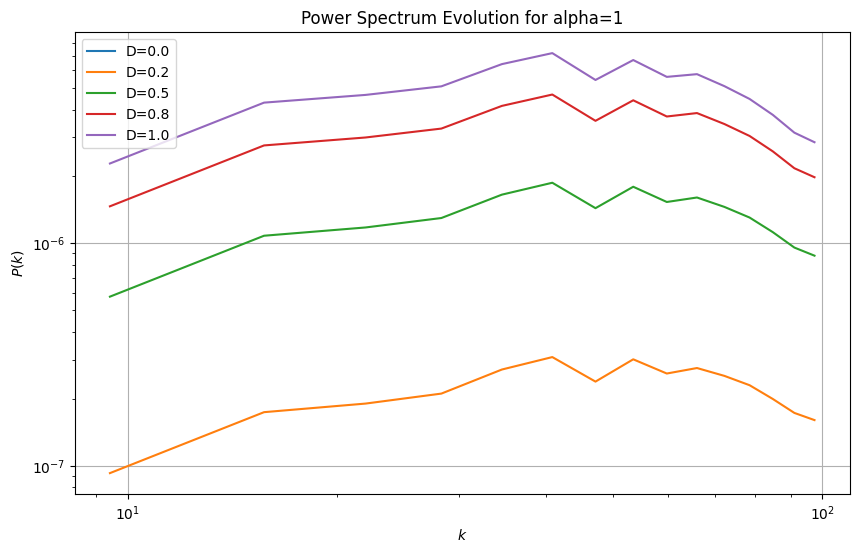

C:\Users\AltonV\AppData\Local\Temp\ipykernel_5656\645330224.py:19: RuntimeWarning: divide by zero encountered in reciprocal
  fk = fk * kmod**-(alpha / 2)  # multiply with amplitude


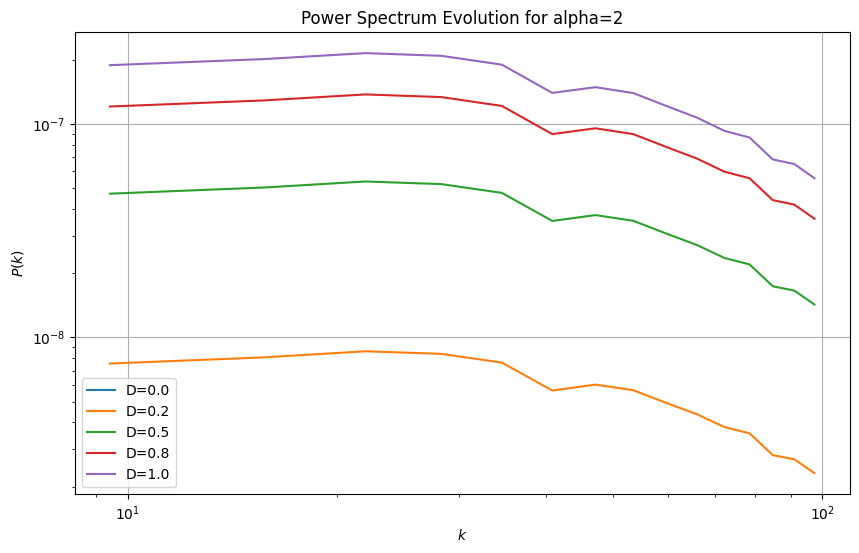

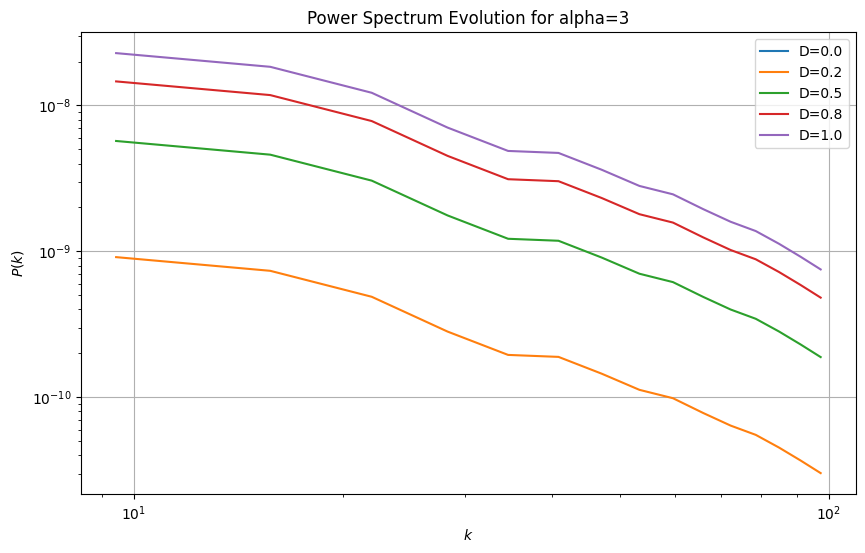

In [96]:
# Parameters
N = 32
alpha = 3
L = 1.0  # the 'physical' box size, sets units of the fundamental mode
kmin = 2.0 * np.pi / L  # the fundamental mode of the box
kmax = kmin * N / 2  # the Nyquist mode of each linear dimension
k1d = np.fft.fftfreq(N, d=1.0 / kmin / N)  # get FFT mode vector
kv = np.meshgrid(k1d, k1d, k1d, indexing='ij')  # get k vector, k = (kx, ky, kz)

# Function to compute the power spectrum
def P_k(k, alpha):
    return np.where(k > 0, k**(-alpha), 0.0)

D_values = [0.0, 0.2, 0.5, 0.8, 1.0]

for alpha in alphas:
    phi_ini = generate_phi_ini(N, alpha)
    gradient_fields = compute_gradient_fields(phi_ini, N)

    plt.figure(figsize=(10, 6))
    
    for D in D_values:
        q_vec, x_vec = displace_particles(N, D, gradient_fields)
        rho = cic_deposit_3d(x_vec[..., 0].flatten(), x_vec[..., 1].flatten(), x_vec[..., 2].flatten(), N)
        k, P = compute_powerspectrum(rho, L)
        plt.loglog(k, P, label=f'D={D:.1f}')
    
    plt.title(f'Power Spectrum Evolution for alpha={alpha}')
    plt.xlabel(r'$k$')
    plt.ylabel(r'$P(k)$')
    plt.legend()
    plt.grid(True)
    plt.show()